In [1]:
import numpy as np
import pandas as pd

#Creation of base dataset
data_term_dep = pd.read_csv(r"C:\zubeda\PGA02_Zubu\Machine Learning Models\RandomForest\bank_customer_survey.csv")

In [2]:
#Top 5 rows of the dataset
data_term_dep.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [3]:
#Dataset has 17 columns & 45k rows 
data_term_dep.shape

(45211, 17)

In [4]:
#Null value treatment
def null_values(base_dataset):
    print(base_dataset.isna().sum())
    #Null value percentage
    null_value_table = (base_dataset.isna().sum() / base_dataset.shape[0]) * 100
    #Null value percentage beyond treshold drop, else treat the columns
    retained_columns = null_value_table[null_value_table < 30].index
    #if any variable as a null value greater than input(linke 30% of the data) value those variable are considered as drop
    drop_columns = null_value_table[null_value_table > 30].index
    base_dataset.drop(drop_columns, axis=1, inplace=True)
    len(base_dataset.isna().sum().index)
    #Continuous variables
    cont = base_dataset.describe().columns
    #Categorical variables
    cat = [i for i in base_dataset.columns if i not in base_dataset.describe().columns]
    for i in cat:
        base_dataset[i].fillna(base_dataset[i].value_counts().index[0], inplace=True)  #Fill with the first categorical class returned in value_counts
    for i in cont:
        base_dataset[i].fillna(base_dataset[i].median(), inplace=True)  #Fill with median
    print(base_dataset.isna().sum())
    return base_dataset, cat, cont

In [5]:
data_term_dep1, cat, cont = null_values(data_term_dep)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [6]:
#Outlier treatment
def outliers_transform(base_dataset):
    for i in base_dataset.var().sort_values(ascending=False).index[0:10]: #var() returns variance of continuous variables
        x = np.array(base_dataset[i])
        qr1 = np.quantile(x, 0.25)
        qr3 = np.quantile(x, 0.75)
        iqr = qr3 - qr1
        utv = qr3 + (1.5 * iqr)
        ltv = qr1 - (1.5 * iqr)
        y = []
        for p in x:
            if p < ltv or p > utv:  #outliers
                y.append(np.median(x))
            else:  #non outliers
                y.append(p)
        base_dataset[i] = y

In [7]:
outliers_transform(data_term_dep1)

In [8]:
#Display the columns after outlier treatment
data_term_dep1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [9]:
#Dummy variable declaration
dummy_columns = []
for i in data_term_dep1.columns:
    if (data_term_dep1[i].nunique() >= 3) & (data_term_dep1[i].nunique() < 5):
        dummy_columns.append(i)
#nunique() returns no. of unique elements in the object. It returns scalar value which is the count of all the unique values in the Index.

In [10]:
dummy_columns

['marital', 'education', 'contact', 'poutcome']

In [11]:
#Dummy variable
dummies_tables = pd.get_dummies(data_term_dep1[dummy_columns])

In [12]:
for i in dummies_tables.columns:
    data_term_dep1[i] = dummies_tables[i]

In [13]:
#Displaying columns after dummy variable creation
data_term_dep1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [14]:
#Drop the existing columns after creation of dummy variable for those
data_term_dep1 = data_term_dep1.drop(dummy_columns, axis=1)

In [15]:
data_term_dep1.columns

Index(['age', 'job', 'default', 'balance', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'y', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_cellular', 'contact_telephone', 'contact_unknown',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [16]:
#Label Encoder
#Label Encoding refers to converting the labels into numeric form so as to convert it into the
#machine-readable form. Machine learning algorithms can then decide in a better way on how those
#labels must be operated. It is an important pre-processing step for the structured dataset in
#supervised learning

from sklearn.preprocessing import LabelEncoder
def label_encoders(data, cat):
    le = LabelEncoder()
    for i in cat:
        le.fit(data[i])  #Fitting label encoder to categorical variables
        x = le.transform(data[i])  #Transforming original value to numerical value
        data[i] = x
    return data

#Tranform function returns a self-produced dataframe with transformed values after applying the
#function specified in its parameter

In [17]:
data_new = data_term_dep1
cat = data_term_dep1.describe(include='object').columns

In [18]:
label_encoders(data_new, cat).head()

,age,job,default,balance,housing,loan,day,month,duration,campaign,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58.0,4,0,2143.0,1,0,5,8,261.0,1.0,...,0,1,0,0,0,1,0,0,0,1
1,44.0,9,0,29.0,1,0,5,8,151.0,1.0,...,1,0,0,0,0,1,0,0,0,1
2,33.0,2,0,2.0,1,1,5,8,76.0,1.0,...,1,0,0,0,0,1,0,0,0,1
3,47.0,1,0,1506.0,1,0,5,8,92.0,1.0,...,0,0,1,0,0,1,0,0,0,1
4,33.0,11,0,1.0,0,0,5,8,198.0,1.0,...,0,0,1,0,0,1,0,0,0,1


In [19]:
data_new.columns

Index(['age', 'job', 'default', 'balance', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'y', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_cellular', 'contact_telephone', 'contact_unknown',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

C:\Users\ashraf\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


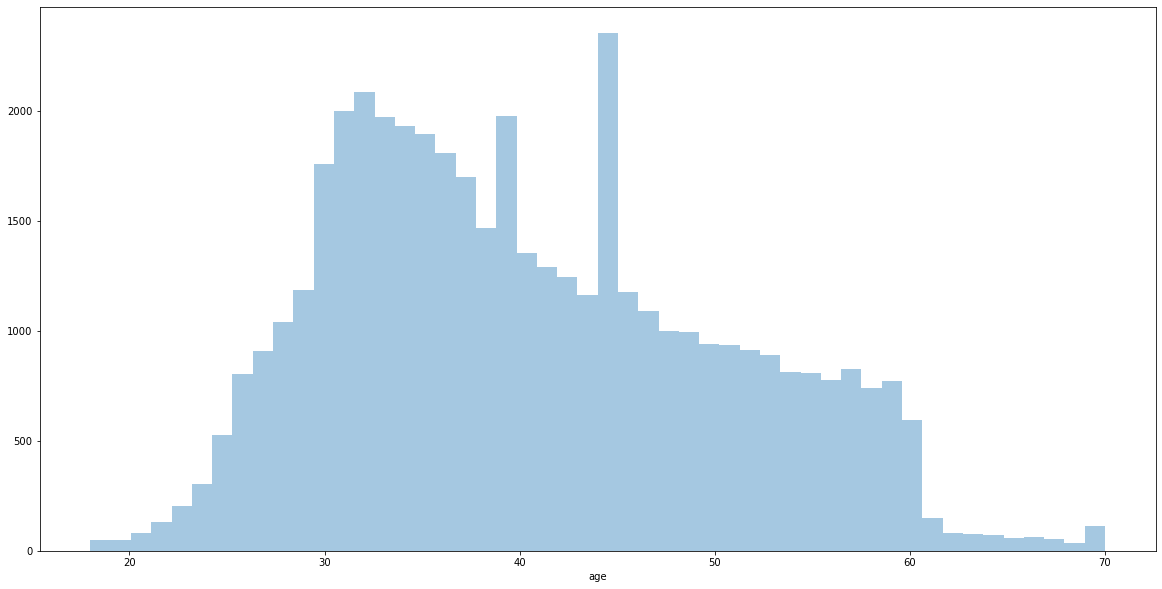

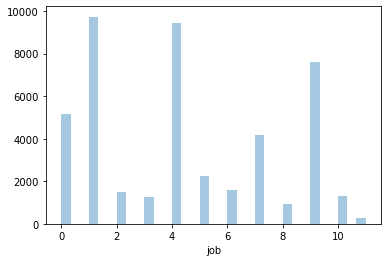

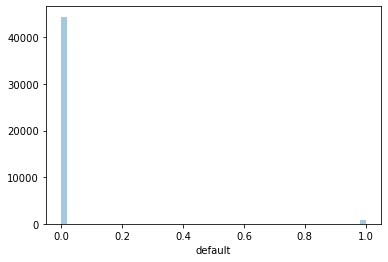

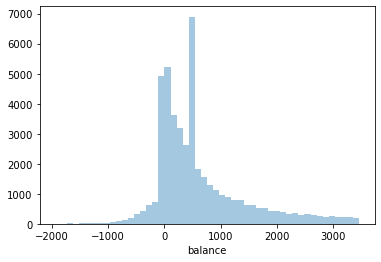

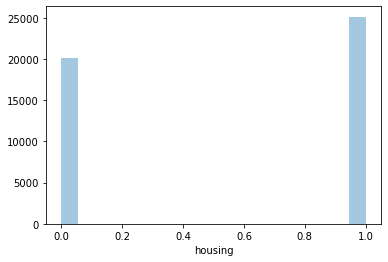

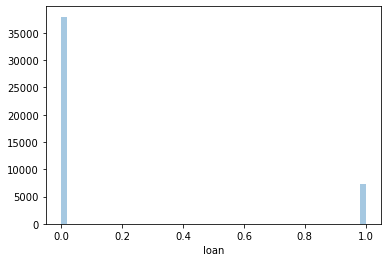

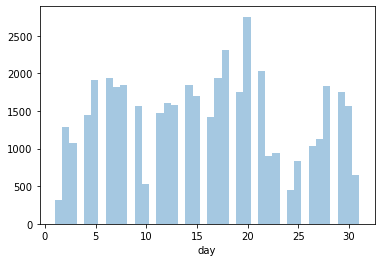

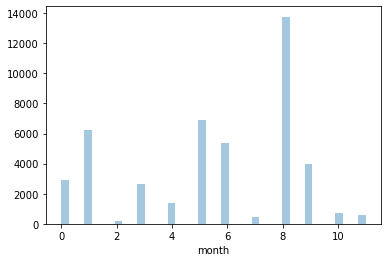

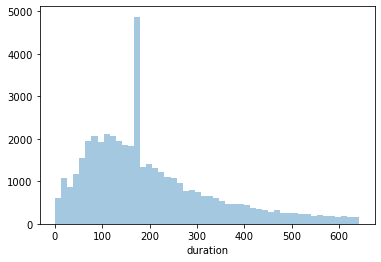

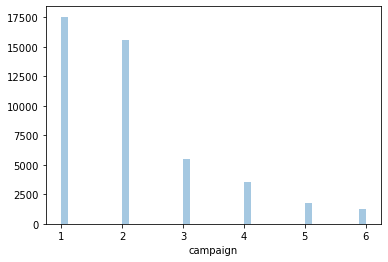

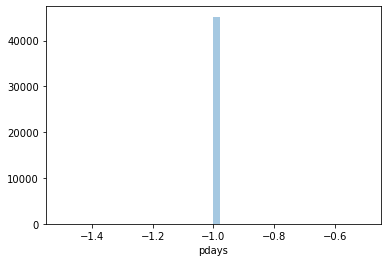

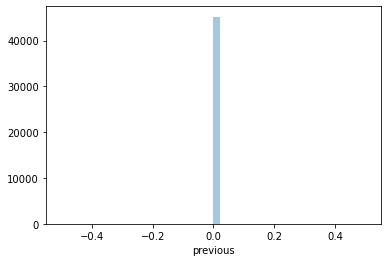

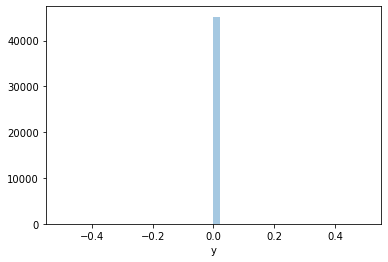

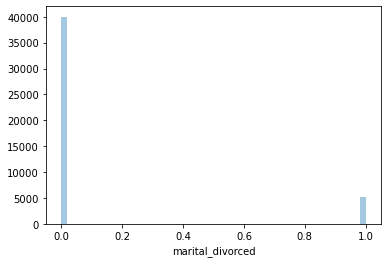

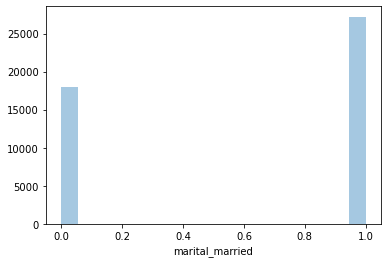

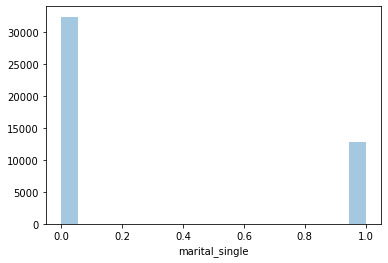

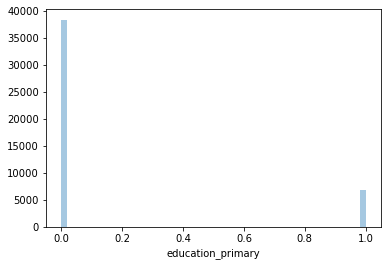

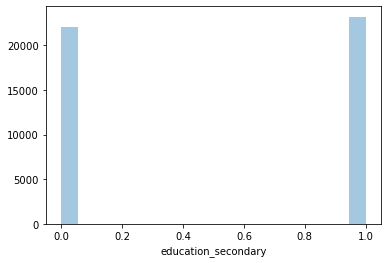

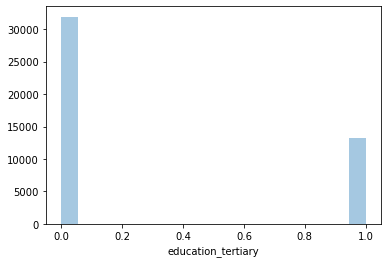

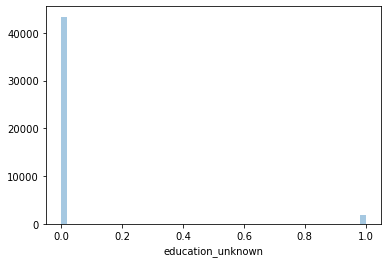

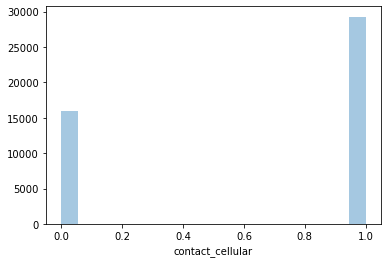

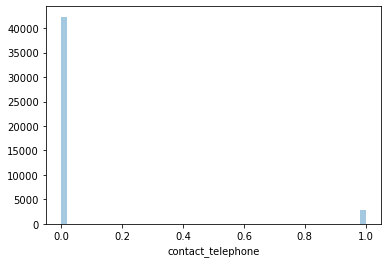

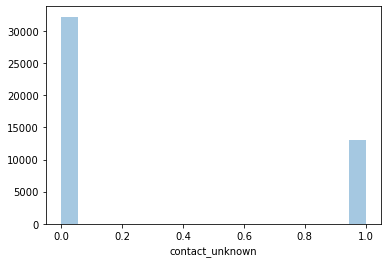

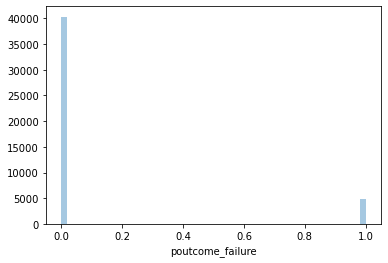

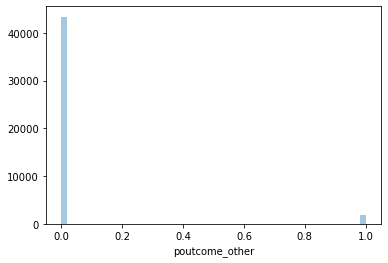

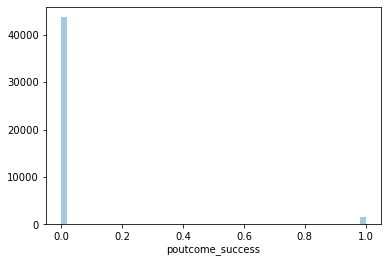

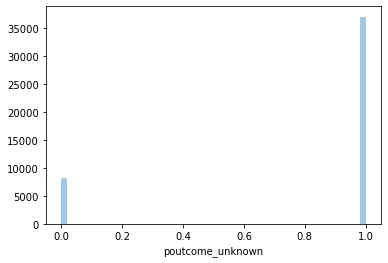

In [20]:
#Univariate analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
for i in data_new.var().index:  #Continuous/Numerical variables plot
    sns.distplot(data_new[i], kde=False)
    plt.show()

#Kernel Density Estimation (KDE) is a way to estimate the probability density function of a continuous
#random variable. By default, seaborn plots both kernel density estimation and histogram, kde=False
#means you want to hide it and only display the histogram
#A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in
#a dataset, analagous to a histogram. ... But it has the potential to introduce distortions if the
#underlying distribution is bounded or not smooth

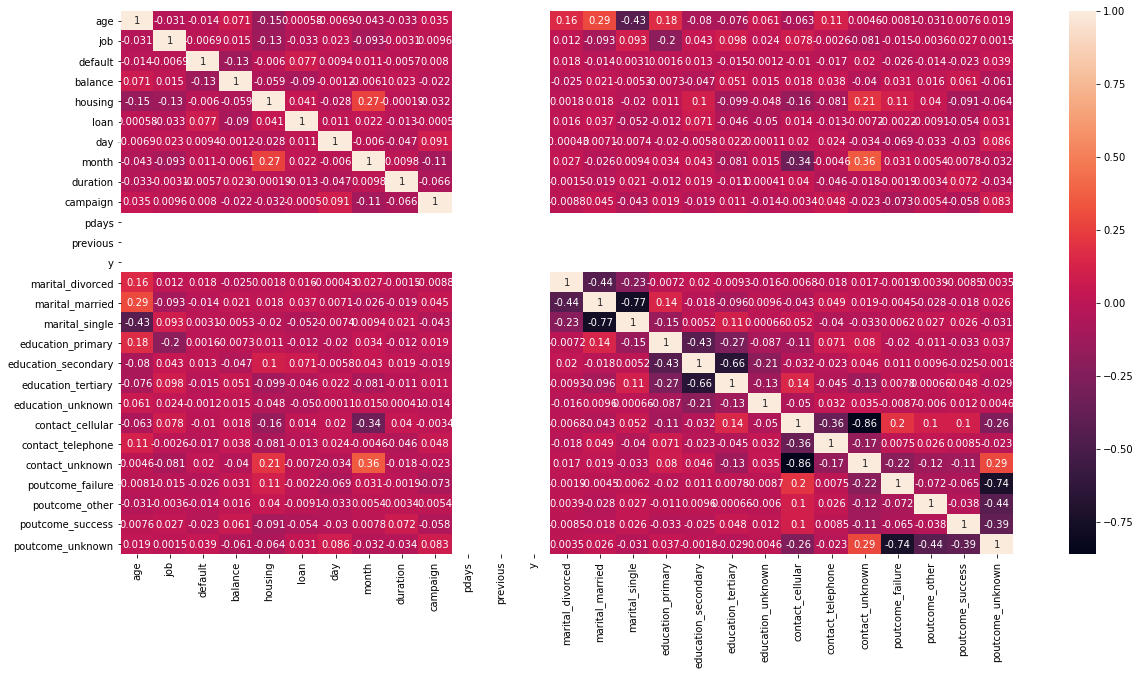

In [21]:
#Bivariate analysis (EDA)
plt.figure(figsize=(20, 10))
sns.heatmap(data_new.corr(), annot=True)
plt.show()

In [22]:
#Model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

In [23]:
y = data_new['y']
x = data_new.drop('y', axis=1)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=43)

In [25]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(36168, 26) (9043, 26) (36168,) (9043,)


In [26]:
models = [DecisionTreeClassifier(), RandomForestClassifier(), BaggingClassifier()]

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
final_accuracy_scores = []
for i in models:
    dt = i
    dt.fit(X_train, y_train)  #Training
    dt.predict(X_test)
    dt.predict(X_train)
    print(confusion_matrix(y_test, dt.predict(X_test)))
    print(accuracy_score(y_test, dt.predict(X_test)))
    print(confusion_matrix(y_train, dt.predict(X_train)))
    print(accuracy_score(y_train, dt.predict(X_train)))
    print(i)
    final_accuracy_scores.append([i, confusion_matrix(y_test, dt.predict(X_test)), accuracy_score(y_test, dt.predict(X_test)), confusion_matrix(y_train, dt.predict(X_train)), accuracy_score(y_train, dt.predict(X_train))])
    from sklearn.model_selection import cross_val_score
    print(cross_val_score(i, X_train, y_train, cv=10))  #10 Cross-validations/Permutaion-combinations
    print()

[[9043]]
1.0
[[36168]]
1.0
DecisionTreeClassifier()
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

[[9043]]
1.0
[[36168]]
1.0
RandomForestClassifier()
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

[[9043]]
1.0
[[36168]]
1.0
BaggingClassifier()
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]



In [28]:
final_accuracy_scores1 = pd.DataFrame(final_accuracy_scores)

In [29]:
final_accuracy_scores1

,0,1,2,3,4
0,DecisionTreeClassifier(),[[9043]],1.0,[[36168]],1.0
1,"(DecisionTreeClassifier(max_features='auto', r...",[[9043]],1.0,[[36168]],1.0
2,(DecisionTreeClassifier(random_state=456116168...,[[9043]],1.0,[[36168]],1.0


In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, dt.predict(X_test))

1.0